## Setup

In [28]:
import sys
from pathlib import Path

REFERENCE_GENOME = "hg38"
TILE_SIZE = 1000

REPO_DIR = Path("/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry")
sys.path.append(str(REPO_DIR / "src" / "util"))
sys.path

['/usr/lib64/python311.zip',
 '/usr/lib64/python3.11',
 '/usr/lib64/python3.11/lib-dynload',
 '',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/.venv/lib64/python3.11/site-packages',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/.venv/lib64/python3.11/site-packages/cyvcf2-0.31.1-py3.11-linux-x86_64.egg',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/.venv/lib/python3.11/site-packages',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/.venv/lib/python3.11/site-packages/cyvcf2-0.31.1-py3.11-linux-x86_64.egg',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util']

## Palladium Trio

In [2]:
FATHER_UID = "NA12877" 
MOTHER_UID = "NA12878"
CHILD_UID = "NA12881" # 2211

## TR DNMs in child

In [3]:
import polars as pl

pl.Config.set_tbl_rows(10)

# Tom Sasani provided TR DNMs for the child 2211: 
# https://quinlangroup.slack.com/archives/D9LFRMXV3/p1753988258836809
CHILD_TR_DNMS = pl.read_csv("/scratch/ucgd/lustre-labs/quinlan/u1006375/CEPH-K1463-TandemRepeats/tr_validation/seq/2211.GRCh38.allele_sequences.tsv", separator="\t")

(
    CHILD_TR_DNMS
    .select(['#chrom', 'start', 'end', 'phase_consensus', 'haplotype_in_parent_consensus', 'denovo_allele_sequence', 'precursor_allele_length_in_parent', 'precursor_sequence_in_parent', 'struc'])
    .with_columns([
        (pl.col('denovo_allele_sequence').str.len_chars() - pl.col('precursor_sequence_in_parent').str.len_chars()).alias('allele_size_difference')
    ])
    .rename({
        '#chrom': 'chrom',
        'phase_consensus': 'parent-of-origin', 
        'haplotype_in_parent_consensus': 'haplotype-of-origin'
    })
)

chrom,start,end,parent-of-origin,haplotype-of-origin,denovo_allele_sequence,precursor_allele_length_in_parent,precursor_sequence_in_parent,struc,allele_size_difference
str,i64,i64,str,str,str,f64,str,str,u32
"""chr10""",101793189,101793216,"""mom:64""","""UNK""","""AAAAACAAAAACAAAAACAAAAACAAAAAC…",-1.0,"""UNK""","""(AAAAAC)n""",36
"""chr10""",30432978,30433009,"""dad:279""","""B""","""AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG…",247.0,"""AGAAGAGAGAGAGAGAGAGAGAGGAGAGGA…","""(GA)n""",4
"""chr10""",30433093,30433105,"""unknown:0""","""UNK""","""GAGAGAGAGAGAGAGAGAGAGAGAGAGAGA…",-1.0,"""UNK""","""(AGGGGG)n""",233
"""chr10""",44662653,44663103,"""dad:445""","""B""","""AGGGGGCTGTGTCGTGGAGGGTGAGGATGG…",6050.0,"""AGGGGGCTGTGTCGTGGAGGGTGAGGATGG…","""(GGGGTCCTAGGCGGCTGTGTCATGGAGGG…",150
"""chr10""",66515265,66515370,"""mom:287""","""B""","""TATCTATCTATCTATCTATCTATCTATCTA…",129.0,"""TATCTATCTATCTATCTATCTATCTATCTA…","""(TA)n(TC)n(TA)n""",4294967284
…,…,…,…,…,…,…,…,…,…
"""chr9""",70469020,70469154,"""dad:144""","""B""","""TTTTCTTTTCTTCTCTTCTCTAATGACTTC…",134.0,"""TTTTCTTTTCTTCTCTTCTCTAATGACTTC…","""(TTTC)n(TC)n(TTTC)n""",109
"""chr9""",96272373,96272473,"""dad:289""","""B""","""TCTCTCTCTCTCTCTCTCTCTCTCTCTCTC…",120.0,"""TCTCTCTCTCTCTCTCTCTCTCTCTCTCTC…","""(TC)n(TA)n""",4294967290
"""chrX""",130516288,130516340,"""dad:123""","""UNK""","""AAATAAATAAATAAATAAATAAATAAATAA…",-1.0,"""UNK""","""(AAAT)n(GT)n""",53


## Founder-phased DNA methylation at CpG sites common to Father, Mother, and Child in the Palladium trio

In [4]:
PB_CPG_TOOL_MODE = 'model' # mode of aligned_bam_to_cpg_scores
# output dir of src/phase_meth_to_founder_haps.py
OUTPUT_DIR = Path(f"/scratch/ucgd/lustre-labs/quinlan/data-shared/dna-methylation/CEPH1463.GRCh38.hifi.{PB_CPG_TOOL_MODE}.founder-phased")
OUTPUT_DIR

PosixPath('/scratch/ucgd/lustre-labs/quinlan/data-shared/dna-methylation/CEPH1463.GRCh38.hifi.model.founder-phased')

In [5]:
from read_data import read_data

def get_methylation_sample(uid): 
    return (
        read_data(OUTPUT_DIR, f"{uid}.dna-methylation.founder-phased")
        .select(['chrom', 'start', 'end', 'methylation_level_pat', 'methylation_level_mat', 'founder_haplotype_pat', 'founder_haplotype_mat'])
    )

get_methylation_sample(FATHER_UID).filter(pl.col("founder_haplotype_pat").is_not_null())

chrom,start,end,methylation_level_pat,methylation_level_mat,founder_haplotype_pat,founder_haplotype_mat
str,i64,i64,f64,f64,str,str
"""chr1""",689237,689238,0.228,0.927,"""E""","""G"""
"""chr1""",689434,689435,0.075,0.577,"""E""","""G"""
"""chr1""",690032,690033,0.889,0.905,"""E""","""G"""
"""chr1""",690091,690092,0.87,0.76,"""E""","""G"""
"""chr1""",690430,690431,0.761,0.045,"""E""","""G"""
…,…,…,…,…,…,…
"""chr9""",138216387,138216388,0.641,0.656,"""E""","""G"""
"""chr9""",138216400,138216401,0.89,0.927,"""E""","""G"""
"""chr9""",138216450,138216451,0.775,0.67,"""E""","""G"""


In [75]:
def prefix_columns(df, prefix, join_keys):
    # add prefixes to all columns except the join keys
    return df.rename({col: f"{prefix}_{col}" for col in df.columns if col not in join_keys})

def get_methylation_trio_by_cpg_site(father_uid, mother_uid, child_uid):
    father_meth = get_methylation_sample(father_uid)
    mother_meth = get_methylation_sample(mother_uid)
    child_meth = get_methylation_sample(child_uid)
    
    father_prefixed = prefix_columns(father_meth, prefix="father", join_keys=['chrom', 'start', 'end'])
    mother_prefixed = prefix_columns(mother_meth, prefix="mother", join_keys=['chrom', 'start', 'end'])
    child_prefixed = prefix_columns(child_meth, prefix="child", join_keys=['chrom', 'start', 'end'])

    # Join on chrom, start, end
    trio_meth_by_cpg_site = (
        father_prefixed
        .join(mother_prefixed, on=['chrom', 'start', 'end'], how='inner')
        .join(child_prefixed, on=['chrom', 'start', 'end'], how='inner')
    )

    # Filter out rows where any founder haplotype is null
    trio_meth_by_cpg_site = trio_meth_by_cpg_site.filter(
        pl.col("father_founder_haplotype_pat").is_not_null() & 
        pl.col("father_founder_haplotype_mat").is_not_null() & 
        pl.col("mother_founder_haplotype_pat").is_not_null() & 
        pl.col("mother_founder_haplotype_mat").is_not_null() & 
        pl.col("child_founder_haplotype_pat").is_not_null() & 
        pl.col("child_founder_haplotype_mat").is_not_null()
    )

    return trio_meth_by_cpg_site

TRIO_METH_BY_CPG_SITE = get_methylation_trio_by_cpg_site(FATHER_UID, MOTHER_UID, CHILD_UID)
TRIO_METH_BY_CPG_SITE

chrom,start,end,father_methylation_level_pat,father_methylation_level_mat,father_founder_haplotype_pat,father_founder_haplotype_mat,mother_methylation_level_pat,mother_methylation_level_mat,mother_founder_haplotype_pat,mother_founder_haplotype_mat,child_methylation_level_pat,child_methylation_level_mat,child_founder_haplotype_pat,child_founder_haplotype_mat
str,i64,i64,f64,f64,str,str,f64,f64,str,str,f64,f64,str,str
"""chr1""",689434,689435,0.075,0.577,"""E""","""G""",0.764,0.695,"""I""","""K""",0.586,0.097,"""G""","""K"""
"""chr1""",690032,690033,0.889,0.905,"""E""","""G""",0.883,0.804,"""I""","""K""",0.858,0.957,"""G""","""K"""
"""chr1""",690091,690092,0.87,0.76,"""E""","""G""",0.796,0.866,"""I""","""K""",0.902,0.924,"""G""","""K"""
"""chr1""",690621,690622,0.785,0.544,"""E""","""G""",0.515,0.494,"""I""","""K""",0.588,0.857,"""G""","""K"""
"""chr1""",690673,690674,0.94,0.583,"""E""","""G""",0.75,0.904,"""I""","""K""",0.634,0.928,"""G""","""K"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr9""",138216387,138216388,0.641,0.656,"""E""","""G""",0.646,0.918,"""I""","""K""",0.889,0.659,"""E""","""K"""
"""chr9""",138216400,138216401,0.89,0.927,"""E""","""G""",0.805,0.928,"""I""","""K""",0.748,0.848,"""E""","""K"""
"""chr9""",138216450,138216451,0.775,0.67,"""E""","""G""",0.845,0.546,"""I""","""K""",0.903,0.399,"""E""","""K"""


## Intervals in each of which all CpG sites share the same founder labels on each of the 6 haplotypes 

In [29]:
import bioframe as bf # https://bioframe.readthedocs.io/en/latest/index.html

def get_tiles(reference_genome, tile_size):
    chromsizes = bf.fetch_chromsizes(db=reference_genome)
    windows = []
    for chrom, length in chromsizes.items():
        for start in range(0, length, tile_size): # type: ignore
            end = start + tile_size
            if end > length:
                continue
            windows.append({"chrom": chrom, "start": start, "end": end})

    return pl.DataFrame(windows)

get_tiles(REFERENCE_GENOME, tile_size=TILE_SIZE)

chrom,start,end
str,i64,i64
"""chr1""",0,1000
"""chr1""",1000,2000
"""chr1""",2000,3000
"""chr1""",3000,4000
"""chr1""",4000,5000
…,…,…
"""chrM""",11000,12000
"""chrM""",12000,13000
"""chrM""",13000,14000


In [8]:
def get_hap_map_blocks(uid):
    return (
        read_data(OUTPUT_DIR, f"{uid}.hap-map-blocks")
        .select(['chrom', 'start', 'end'])
    )

get_hap_map_blocks(FATHER_UID)

chrom,start,end
str,i64,i64
"""chr1""",668466,1052726
"""chr1""",1074443,1079281
"""chr1""",1108637,1265603
"""chr1""",1288373,1610923
"""chr1""",1613420,2370170
…,…,…
"""chr9""",137873339,137943538
"""chr9""",137976541,137977195
"""chr9""",138002413,138087950


In [ ]:
def get_intervals(reference_genome, tile_size, father_uid, mother_uid, child_uid):
    tiles = get_tiles(reference_genome, tile_size).to_pandas()
    father_blocks = get_hap_map_blocks(father_uid).to_pandas()
    mother_blocks = get_hap_map_blocks(mother_uid).to_pandas()
    child_blocks = get_hap_map_blocks(child_uid).to_pandas()

    # Intersect tiles and father blocks using bioframe.overlap
    tiles_father = (
        bf.overlap(
            tiles,
            father_blocks,
            how='inner',
            return_overlap=True
        )
        [["chrom", "overlap_start", "overlap_end"]]
        .rename(columns={"overlap_start": "start", "overlap_end": "end"})
    )

    # Intersect tiles_father and mother blocks using bioframe.overlap
    tiles_father_mother = (
        bf.overlap(
            tiles_father,
            mother_blocks,
            how='inner',
            return_overlap=True
        )
        [["chrom", "overlap_start", "overlap_end"]]
        .rename(columns={"overlap_start": "start", "overlap_end": "end"})
    )

    # Intersect tiles_father_mother and child blocks using bioframe.overlap
    tiles_father_mother_child = (
        bf.overlap(
            tiles_father_mother,
            child_blocks,
            how='inner',
            return_overlap=True
        )
        [["chrom", "overlap_start", "overlap_end"]]
        .rename(columns={"overlap_start": "start", "overlap_end": "end"})
    )

    return pl.from_pandas(tiles_father_mother_child)

INTERVALS = get_intervals(REFERENCE_GENOME, tile_size=TILE_SIZE, father_uid=FATHER_UID, mother_uid=MOTHER_UID, child_uid=CHILD_UID)
INTERVALS

chrom,start,end
str,i64,i64
"""chr18""",13753,14000
"""chr18""",66811,67000
"""chr18""",446556,447000
"""chr18""",1562269,1563000
"""chr18""",2096903,2097000
…,…,…
"""chr3""",198127000,198128000
"""chr3""",198128000,198129000
"""chr3""",198129000,198130000


## Founder-phased DNA methylation of trio, broken down by intervals (defined in previous section)

In [76]:
def get_methylation_trio_by_interval(trio_meth_by_cpg_site, intervals):
    # Assign each CpG site to an interval
    trio_meth_by_cpg_site = bf.overlap(
        trio_meth_by_cpg_site.to_pandas(),
        intervals.to_pandas(),
        how='inner',
        return_overlap=False
    )

    # Drop and rename interval columns
    trio_meth_by_cpg_site = (
        pl.from_pandas(trio_meth_by_cpg_site)
        .drop(["chrom_"])
        .rename({
            "start_": "start_interval",
            "end_": "end_interval",
        })
    )

    # Group by interval and founder haplotypes, aggregate methylation levels using Polars API
    trio_meth_by_interval = (
        trio_meth_by_cpg_site
        .group_by([
            "chrom", "start_interval", "end_interval",
            # founder haplotypes are the same for all CpG sites in a given interval, by construction
            "father_founder_haplotype_pat", "father_founder_haplotype_mat",
            "mother_founder_haplotype_pat", "mother_founder_haplotype_mat",
            "child_founder_haplotype_pat", "child_founder_haplotype_mat"
        ])
        .agg([
            pl.col("father_methylation_level_pat").mean(),
            pl.col("father_methylation_level_mat").mean(),
            pl.col("mother_methylation_level_pat").mean(),
            pl.col("mother_methylation_level_mat").mean(),
            pl.col("child_methylation_level_pat").mean(),
            pl.col("child_methylation_level_mat").mean(),
            pl.col("start").count().alias("num_cpgs"),
            # TESTING: compute number of unique founder haplotypes at each CpG site in each interval
            # (pl.col("father_founder_haplotype_pat").n_unique()).alias("father_founder_haplotype_pat_unique"),
            # (pl.col("father_founder_haplotype_mat").n_unique()).alias("father_founder_haplotype_mat_unique"),
            # (pl.col("mother_founder_haplotype_pat").n_unique()).alias("mother_founder_haplotype_pat_unique"),
            # (pl.col("mother_founder_haplotype_mat").n_unique()).alias("mother_founder_haplotype_mat_unique"),
            # (pl.col("child_founder_haplotype_pat").n_unique()).alias("child_founder_haplotype_pat_unique"),
            # (pl.col("child_founder_haplotype_mat").n_unique()).alias("child_founder_haplotype_mat_unique"),
        ])
    )

    # TESTING: Check that values of founder haplotypes at all CpG sites in each interval are the same
    # unique_cols = [col for col in trio_meth_by_interval.columns if col.endswith('_unique')]
    # for col in unique_cols:
    #     all_ones = (trio_meth_by_interval[col] == 1).all()
    #     print(f"Is '{col}' all 1s?:", all_ones)

    return trio_meth_by_interval.rename({"start_interval": "start", "end_interval": "end"})

TRIO_METH_BY_INTERVAL = get_methylation_trio_by_interval(TRIO_METH_BY_CPG_SITE, INTERVALS)
TRIO_METH_BY_INTERVAL

chrom,start,end,father_founder_haplotype_pat,father_founder_haplotype_mat,mother_founder_haplotype_pat,mother_founder_haplotype_mat,child_founder_haplotype_pat,child_founder_haplotype_mat,father_methylation_level_pat,father_methylation_level_mat,mother_methylation_level_pat,mother_methylation_level_mat,child_methylation_level_pat,child_methylation_level_mat,num_cpgs
str,i64,i64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,u32
"""chr6""",116687000,116688000,"""E""","""G""","""I""","""K""","""G""","""K""",0.9445,0.942,0.94625,0.947,0.89225,0.846125,8
"""chr14""",54746000,54747000,"""E""","""G""","""I""","""K""","""G""","""K""",0.928875,0.92275,0.902125,0.90825,0.909,0.856125,8
"""chr1""",41458000,41459000,"""E""","""G""","""I""","""K""","""E""","""I""",0.856875,0.85825,0.8675,0.7965,0.8845,0.8675,8
"""chr2""",156879000,156880000,"""E""","""G""","""I""","""K""","""G""","""K""",0.817,0.86525,0.81125,0.814875,0.847375,0.777375,8
"""chr1""",175618000,175619000,"""E""","""G""","""I""","""K""","""G""","""I""",0.365,0.563,0.5305,0.4305,0.627,0.8385,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr2""",41646000,41647000,"""E""","""G""","""I""","""K""","""E""","""I""",0.9345,0.9495,0.932,0.949,0.9155,0.952,2
"""chr20""",18327000,18328000,"""E""","""G""","""I""","""K""","""E""","""I""",0.934,0.950167,0.938,0.928,0.953667,0.946833,6
"""chr14""",93886000,93887000,"""E""","""G""","""I""","""K""","""G""","""I""",0.8698,0.9066,0.9133,0.8809,0.9037,0.8123,10


## Searching for epimutations

In [78]:
# For each child haplotype, create a polars expression that selects the corresponding parent methylation value
def get_parent_meth_expr(child_hap):
    return (
        pl
        .when(pl.col(child_hap) == pl.col("father_founder_haplotype_pat")).then(pl.col("father_methylation_level_pat"))
        .when(pl.col(child_hap) == pl.col("father_founder_haplotype_mat")).then(pl.col("father_methylation_level_mat"))
        .when(pl.col(child_hap) == pl.col("mother_founder_haplotype_pat")).then(pl.col("mother_methylation_level_pat"))
        .when(pl.col(child_hap) == pl.col("mother_founder_haplotype_mat")).then(pl.col("mother_methylation_level_mat"))
        .otherwise(None)
    )

def compute_parent_child_methylation_diffs(trio_meth):
    return (
        trio_meth
        .with_columns([
            get_parent_meth_expr("child_founder_haplotype_pat").alias("parent_methylation_level_for_child_pat"),
            get_parent_meth_expr("child_founder_haplotype_mat").alias("parent_methylation_level_for_child_mat"),
        ])
        .with_columns([
            (pl.col("child_methylation_level_pat") - pl.col("parent_methylation_level_for_child_pat")).alias("diff_methylation_pat"),
            (pl.col("child_methylation_level_mat") - pl.col("parent_methylation_level_for_child_mat")).alias("diff_methylation_mat"),
        ])
    )

TRIO_METH_BY_CPG_SITE_WITH_DIFFS = compute_parent_child_methylation_diffs(TRIO_METH_BY_CPG_SITE)
TRIO_METH_BY_INTERVAL_WITH_DIFFS = compute_parent_child_methylation_diffs(TRIO_METH_BY_INTERVAL) 
TRIO_METH_BY_INTERVAL_WITH_DIFFS

chrom,start,end,father_founder_haplotype_pat,father_founder_haplotype_mat,mother_founder_haplotype_pat,mother_founder_haplotype_mat,child_founder_haplotype_pat,child_founder_haplotype_mat,father_methylation_level_pat,father_methylation_level_mat,mother_methylation_level_pat,mother_methylation_level_mat,child_methylation_level_pat,child_methylation_level_mat,num_cpgs,parent_methylation_level_for_child_pat,parent_methylation_level_for_child_mat,diff_methylation_pat,diff_methylation_mat
str,i64,i64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,u32,f64,f64,f64,f64
"""chr6""",116687000,116688000,"""E""","""G""","""I""","""K""","""G""","""K""",0.9445,0.942,0.94625,0.947,0.89225,0.846125,8,0.942,0.947,-0.04975,-0.100875
"""chr14""",54746000,54747000,"""E""","""G""","""I""","""K""","""G""","""K""",0.928875,0.92275,0.902125,0.90825,0.909,0.856125,8,0.92275,0.90825,-0.01375,-0.052125
"""chr1""",41458000,41459000,"""E""","""G""","""I""","""K""","""E""","""I""",0.856875,0.85825,0.8675,0.7965,0.8845,0.8675,8,0.856875,0.8675,0.027625,1.1102e-16
"""chr2""",156879000,156880000,"""E""","""G""","""I""","""K""","""G""","""K""",0.817,0.86525,0.81125,0.814875,0.847375,0.777375,8,0.86525,0.814875,-0.017875,-0.0375
"""chr1""",175618000,175619000,"""E""","""G""","""I""","""K""","""G""","""I""",0.365,0.563,0.5305,0.4305,0.627,0.8385,2,0.563,0.5305,0.064,0.308
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr2""",41646000,41647000,"""E""","""G""","""I""","""K""","""E""","""I""",0.9345,0.9495,0.932,0.949,0.9155,0.952,2,0.9345,0.932,-0.019,0.02
"""chr20""",18327000,18328000,"""E""","""G""","""I""","""K""","""E""","""I""",0.934,0.950167,0.938,0.928,0.953667,0.946833,6,0.934,0.938,0.019667,0.008833
"""chr14""",93886000,93887000,"""E""","""G""","""I""","""K""","""G""","""I""",0.8698,0.9066,0.9133,0.8809,0.9037,0.8123,10,0.9066,0.9133,-0.0029,-0.101


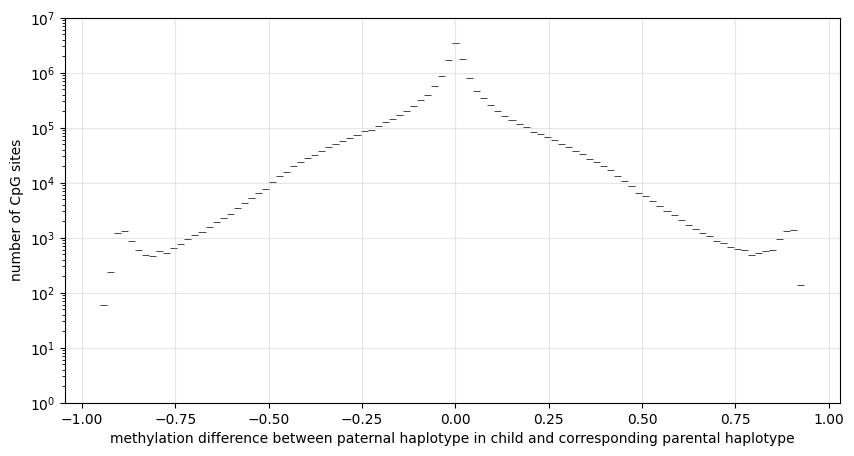

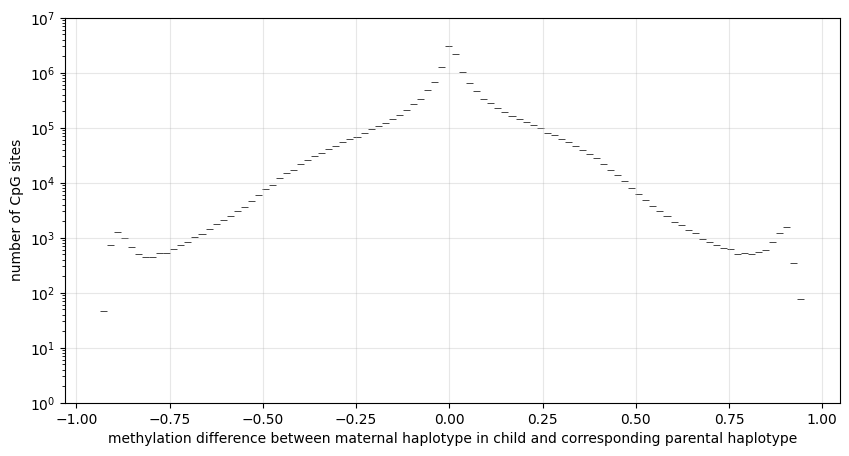

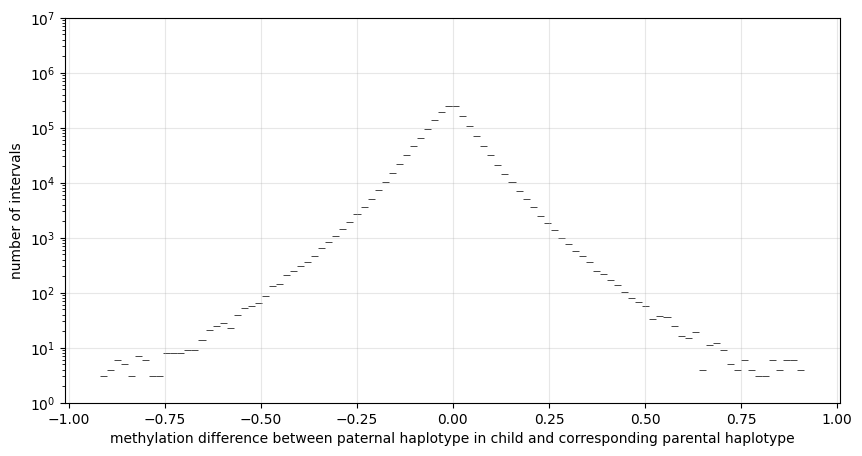

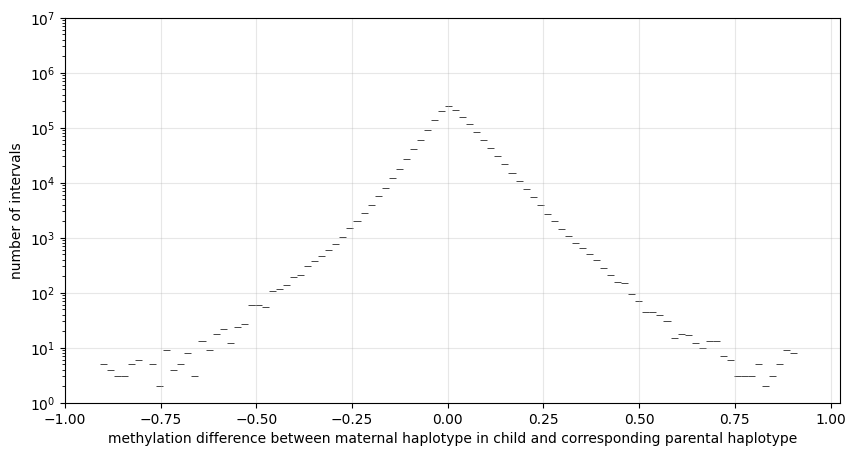

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_diff_methylation(trio_meth_with_diffs, child_hap, ylabel):
    assert child_hap in ['pat', 'mat']
    
    diff_meth_col = f'diff_methylation_{child_hap}'
    diffs = trio_meth_with_diffs[diff_meth_col].to_numpy()

    xlabel = (
        'methylation difference between paternal haplotype in child and corresponding parental haplotype' 
        if child_hap == 'pat' 
        else 'methylation difference between maternal haplotype in child and corresponding parental haplotype'
    )

    plt.figure(figsize=(10, 5))
    sns.histplot(diffs, bins=100, color='skyblue', edgecolor='black', log_scale=(False, True))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.ylim(1e0, 1e7)
    plt.show()

plot_diff_methylation(TRIO_METH_BY_CPG_SITE_WITH_DIFFS, child_hap="pat", ylabel="number of CpG sites")
plot_diff_methylation(TRIO_METH_BY_CPG_SITE_WITH_DIFFS, child_hap="mat", ylabel="number of CpG sites")

plot_diff_methylation(TRIO_METH_BY_INTERVAL_WITH_DIFFS, child_hap="pat", ylabel="number of intervals")
plot_diff_methylation(TRIO_METH_BY_INTERVAL_WITH_DIFFS, child_hap="mat", ylabel="number of intervals")

In [ ]:
# TODO (Friday)
# 1. inspect the rows of the dataframes where the diffs are extreme 
# 2. inspect the corresponding regions in IGV 
# 3. is there an expected null distribution for the diffs?